In [2]:
import numpy as np
import pandas as pd
import random
import scipy
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="whitegrid")

In [3]:
dir = '/content/drive/MyDrive/Projects/Python Tarot Reading/'
df = pd.read_json(dir + 'tarot-images.json', orient='records')
df_cards = pd.json_normalize(df['cards'])
df_cards

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ten of Pentacles,10,Minor Arcana,Pentacles,p10.jpg,"[Big money is in the near future, Expect a pow...","[wealth, abundance, acquisition, greed]",NaN,NaN,"10 (The End: finality, completion, exhaustion)",NaN,NaN,"[How much stuff do I really need?, How do I fe...",[Celebrating your physical and financial bless...,[Spending all of your money on extravagant gif...,Mercury in Virgo,"""I keep physical and financial matters in pers..."
74,Page of Pentacles,11,Minor Arcana,Pentacles,p11.jpg,[This card represents a young man or woman wit...,"[practicality, prosperity, learning, growth, a...",NaN,NaN,NaN,Earth of Earth.,NaN,[How can you get more financial or sexual expe...,"[Learning the value of a dollar, Starting a sa...",[Trying to appear healthier or wealthier than ...,NaN,"""I am physically and financially responsible."""
75,Knight of Pentacles,12,Minor Arcana,Pentacles,p12.jpg,[A stingy person may chide you for spending mo...,"[caution, focus, realism, invention]",NaN,NaN,NaN,Air of Earth.,NaN,[What's the difference between caution and fea...,"[Spending money wisely, Saving for a rainy day...","[Throwing caution to the four winds, Spending ...",NaN,"""I temper my actions with cautious optimism."""
76,Queen of Pentacles,13,Minor Arcana,Pentacles,p13.jpg,[This card represents a woman with an expansiv...,"[luxury, comfort, resourcefulness, generosity,...",NaN,NaN,NaN,Water of Earth.,NaN,"[How do I define luxury?, To what extent am I ...","[Appreciating fine food, fine wine, beautiful ...","[Indulging in gluttony or greediness, Becoming..."

In [28]:
def playDefault(mode):

  print('\nReading your fortune... 🔮\n')

  modes = [['Past','Present','Future'], ['Situation','Action','Outcome'], ['You','Partner','Relationship']]

  cards3 = random.sample(range(78), k=3)

  fortunes = []
  names = []
  images = []

  for i in range(3):
    fortunes.append( df_cards.loc[cards3[i],'fortune_telling'][random.randint(0, len(df_cards.loc[cards3[i],'fortune_telling'])-1)] )
    names.append( df_cards.loc[cards3[i],'name'] )
    images.append( df_cards.loc[cards3[i],'img'] )

  fig, ax = plt.subplots(1, 3, figsize = (8,4))

  for i in range(3):
    img = plt.imread(dir + 'cards/' + images[i])
    ax[i].imshow(img)
    ax[i].set_title(names[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    print(f'Your \033[1m{modes[mode][i]}\033[0m is \033[1m{names[i]}.\033[0m {fortunes[i]}.')
  print()

In [39]:
def playLightDark(mode):

  print('\nReading your fortune... 🔮\n')

  modes = [['Past','Present','Future'], ['Situation','Action','Outcome'], ['You','Partner','Relationship']]
  lightDark = ['meanings.light', 'meanings.shadow']

  cards3 = random.sample(range(78), k=3)
  binary3 = [random.randint(0,1), random.randint(0,1), random.randint(0,1)]

  fortunes = []
  names = []
  images = []

  for i in range(3):
    orientation = lightDark[binary3[i]]
    fortunes.append( df_cards.loc[cards3[i], orientation][random.randint(0, len(df_cards.loc[cards3[i], orientation])-1)] )
    names.append( df_cards.loc[cards3[i], 'name'] )
    images.append( df_cards.loc[cards3[i], 'img'] )

  fig, ax = plt.subplots(1, 3, figsize = (8,4))

  for i in range(3):

    # Check if reversed
    img = plt.imread(dir + 'cards/' + images[i])
    if binary3[i] == 1:
      img = scipy.ndimage.rotate(img, 180)
    else:
      img = scipy.ndimage.rotate(img, 0)
    
    ax[i].imshow(img)

    # Check if reversed
    name = names[i]
    if binary3[i] == 1:
      name += ' (Reversed)'

    ax[i].set_title(names[i])

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    print(f'Your \033[1m{modes[mode][i]}\033[0m is \033[1m{name}.\033[0m {fortunes[i]}.')
  print()

In [37]:
def validInt(min, max):
  while True:
    try:
      ans = int(input('Enter a number: '))

      if ans < min:
        raise Exception
      elif ans > max:
        raise Exception
      else:
        return ans

    except:
      return 0

What reading would you like? 
[1] 3-Card Default 
[2] 3-Card Light & Shadow 
[*] Exit
Enter a number: 2

[1] Past-Present-Future 
[2] Situation-Action-Outcome 
[3] You-Partner-Relationship 
[*] Exit
Enter a number: 1

Reading your fortune... 🔮

Your Past is Three of Wands (Reversed). Launching a project without a clear definition of who should do what.
Your Present is The Chariot. Basking in the glory of achievement.
Your Future is Page of Wands (Reversed). Habitually discounting input or feedback from others.



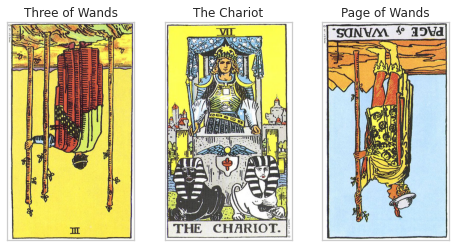

In [40]:
print('What reading would you like? \n[1] 3-Card Default \n[2] 3-Card Light & Shadow \n[*] Exit')

r = validInt(1,2)
if r == 1:
  print('\n[1] Past-Present-Future \n[2] Situation-Action-Outcome \n[3] You-Partner-Relationship \n[*] Exit')

  r = validInt(1,3)
  if r != 0:
    playDefault(r-1)
  else:
    print('\nCrystal ball shutting down... 🔮')

elif r == 2:
  print('\n[1] Past-Present-Future \n[2] Situation-Action-Outcome \n[3] You-Partner-Relationship \n[*] Exit')

  r = validInt(1,3)
  if r != 0:
    playLightDark(r-1)
  else:
    print('\nCrystal ball shutting down... 🔮')

else:
  print('\nCrystal ball shutting down... 🔮')